In [1]:
import pandas as pd
import numpy as np
import re
from matplotlib import pyplot as plt
import seaborn as sns
import random

In [2]:
data   = pd.read_csv('./data/properati-fase2Geo.csv', sep = ",", low_memory=False)
subtes = pd.read_csv('./data/estaciones-de-subte.csv', sep = ",", low_memory=False)

data["lat"] = data["lat"].astype(np.float)
data["lon"] = data["lon"].astype(np.float)
data.dtypes

Tipo_Propiedad            object
Región                    object
lat-lon                   object
lat                      float64
lon                      float64
Precio                   float64
surface_total_in_m2      float64
surface_covered_in_m2    float64
Descripción               object
Título                    object
Precio_por_m2            float64
Garage                     int64
Estado                     int64
Pileta                     int64
Balcon                     int64
Gimnasio                   int64
Quincho                    int64
Parrilla                   int64
Patio                      int64
Lavadero                   int64
Amenities                  int64
Ambientes                float64
Barrio                    object
dtype: object

In [3]:
#Con esta funciòn aplicamos a una nueva columna, las distancias entre las propiedades y la estaciòn de subte más cercana
def haversine(Olat, Olon, Dlat, Dlon):
    radius = 6371  # km
    d_lat = np.radians(Dlat - Olat)
    d_lon = np.radians(Dlon - Olon)
    a = (np.sin(d_lat / 2.) * np.sin(d_lat / 2.) +
         np.cos(np.radians(Olat)) * np.cos(np.radians(Dlat)) *
         np.sin(d_lon / 2.) * np.sin(d_lon / 2.))
    c = 2. * np.arctan2(np.sqrt(a), np.sqrt(1. - a))
    d = radius * c
    return d

def search_closest_distance(datasubte, lat, lng):
    datasubte['dist'] = datasubte.apply(lambda x: haversine(x['lat'], x['long'], lat, lng), axis=1)
    return datasubte['dist'].min()

In [4]:
#sacamos la columna lat-lon
data.drop(["lat-lon"], axis=1, inplace = True)

In [5]:
#se aplica la distancia entre la propiedad y la estaciòn de subte màs cercana
def apply_distance(x):
    if x['lat'] is np.nan:
        return 0
    if x['lon'] is np.nan:
        return 0
    if x['Región'] != 'Capital Federal':
        return 0
    return search_closest_distance(subtes, x['lat'], x['lon'])
data['dist_subte'] = data.apply(apply_distance, axis=1)

In [6]:
subtes_mask = data['lat'].notna() & data['lon'].notna() & (data['Región'] == 'Capital Federal')
data.loc[subtes_mask, ['lat', 'lon','dist_subte']].head()


,lat,lon,dist_subte
0,-34.661824,-58.508839,4.781915
1,-34.652262,-58.522982,5.436760
4,-34.559873,-58.443362,1.068329
5,-34.559873,-58.443362,1.068329
9,-34.652356,-58.501624,3.788993


In [7]:
nosubtes_mask = data['lat'].notna() & data['lon'].notna() & (data['Región'] != 'Capital Federal')
data.loc[nosubtes_mask, ['lat', 'lon', 'dist_subte']].head()

,lat,lon,dist_subte
2,-38.002626,-57.549447,0.0
3,-34.532957,-58.521782,0.0
6,-34.486019,-58.503814,0.0
8,-34.587911,-58.698783,0.0
10,-34.408717,-58.634389,0.0


In [8]:
data.Tipo_Propiedad.value_counts()

apartment    48803
house        26890
PH            4227
store         2192
Name: Tipo_Propiedad, dtype: int64

In [9]:
houses = data[data.Tipo_Propiedad.isin(["PH", "house"])]
houses.describe()

,lat,lon,Precio,surface_total_in_m2,surface_covered_in_m2,Precio_por_m2,Garage,Estado,Pileta,Balcon,Gimnasio,Quincho,Parrilla,Patio,Lavadero,Amenities,Ambientes,dist_subte
count,16877.000000,16877.000000,3.111700e+04,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,31117.000000,6604.000000,30858.000000
mean,-34.658819,-59.220907,2.747058e+05,311.289199,188.870039,1462.618524,0.237587,0.033165,0.229906,0.103609,0.015169,0.121348,0.362631,0.359835,0.320532,1.513031,3.741672,0.140470
std,1.844968,2.174474,2.176115e+05,429.007430,122.414480,509.007128,0.425612,0.179071,0.420779,0.304757,0.122225,0.326537,0.480767,0.479960,0.466689,1.447100,1.221203,0.646335
min,-54.806017,-71.665143,8.412550e+03,14.000000,14.000000,515.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-34.713356,-58.784943,1.300000e+05,125.000000,103.000000,1076.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
50%,-34.600087,-58.579658,2.200000e+05,209.000000,162.000000,1407.407407,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000
75%,-34.425087,-58.425523,3.500000e+05,336.000000,240.000000,1793.103448,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,4.000000,0.000000
max,-24.166966,-54.608075,3.900000e+06,9800.000000,1700.000000,3275.362319,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,5.969436


In [10]:
apartments = data[data.Tipo_Propiedad.isin(["apartment"])]
apartments.describe()

,lat,lon,Precio,surface_total_in_m2,surface_covered_in_m2,Precio_por_m2,Garage,Estado,Pileta,Balcon,Gimnasio,Quincho,Parrilla,Patio,Lavadero,Amenities,Ambientes,dist_subte
count,30872.000000,30872.000000,4.880300e+04,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,48803.000000,20534.000000,44669.000000
mean,-34.863663,-58.782876,1.528217e+05,71.450956,63.602176,2367.859679,0.232424,0.066328,0.128742,0.369977,0.054833,0.031371,0.178534,0.110157,0.179702,1.053316,2.633145,0.285718
std,1.608190,1.627218,1.255223e+05,86.801490,42.049219,767.694487,0.422382,0.248857,0.334918,0.482803,0.227656,0.174320,0.382966,0.313089,0.383943,1.230256,0.936068,0.661021
min,-54.819736,-71.663515,1.690362e+04,11.000000,11.000000,892.857143,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-34.639713,-58.553415,8.100000e+04,42.000000,40.000000,1785.714286,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,-34.600688,-58.445749,1.170000e+05,56.000000,51.000000,2264.150943,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,-34.555898,-58.389582,1.761310e+05,80.000000,74.000000,2884.615385,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.310558
max,-24.181316,-54.584900,2.499000e+06,9900.000000,1356.000000,4497.225806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,9.000000,6.990312


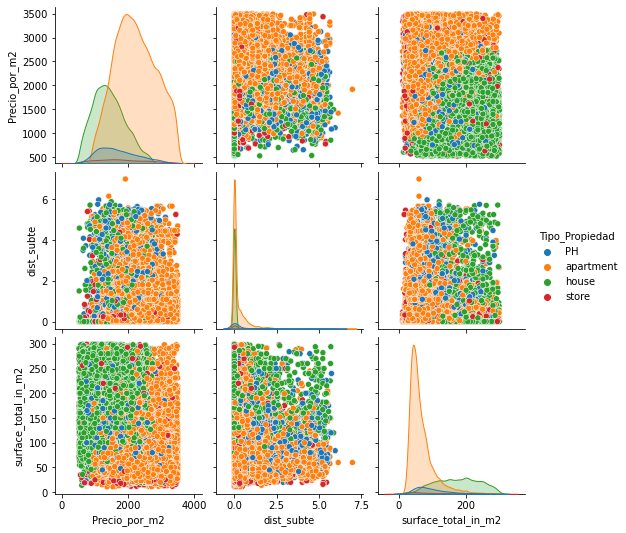

In [11]:
#grafico de distribuciones viendo segùn tipo de propiedad, las variables precio por m2, distancia al subte y superficie
mask_graph = (data.Precio_por_m2 < 3500) & (data.surface_total_in_m2 < 300) 
sns.pairplot(
    data[mask_graph],
    vars=['Precio_por_m2', 'dist_subte', 'surface_total_in_m2'],
    hue='Tipo_Propiedad',
    height=2.5)

In [12]:
subtes_mask = (data['Región'] == 'Capital Federal') & mask_graph
data.loc[subtes_mask, ['lat', 'lon', 'dist_subte']].describe()

,lat,lon,dist_subte
count,16105.000000,16105.000000,16105.000000
mean,-34.603620,-58.438137,0.946960
std,0.025995,0.040229,1.092643
min,-34.698136,-58.544722,0.000493
25%,-34.622318,-58.467972,0.283029
50%,-34.605261,-58.439695,0.533594
75%,-34.586697,-58.404558,1.095236
max,-34.534530,-58.354956,6.990312


In [13]:
data[data['Región'] == 'Capital Federal']
data.describe()

,lat,lon,Precio,surface_total_in_m2,surface_covered_in_m2,Precio_por_m2,Garage,Estado,Pileta,Balcon,Gimnasio,Quincho,Parrilla,Patio,Lavadero,Amenities,Ambientes,dist_subte
count,48977.000000,48977.000000,8.211200e+04,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,82112.000000,27249.000000,77624.000000
mean,-34.793322,-58.937227,2.038258e+05,166.965218,115.391660,2010.493492,0.230356,0.052806,0.164032,0.260011,0.038472,0.065009,0.244447,0.204221,0.228956,1.205147,2.903666,0.226306
std,1.698493,1.853889,1.896659e+05,300.753633,113.074005,813.449399,0.421063,0.223647,0.370307,0.438643,0.192334,0.246543,0.429761,0.403134,0.420163,1.333626,1.119938,0.658153
min,-54.819736,-71.665143,8.412550e+03,11.000000,11.000000,509.090909,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,-34.660640,-58.659393,9.000000e+04,50.000000,46.000000,1400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000
50%,-34.600998,-58.468380,1.435091e+05,81.000000,74.000000,1892.032934,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000
75%,-34.505208,-58.395171,2.500000e+05,182.000000,150.000000,2500.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000
max,-24.166966,-54.584900,4.600000e+06,9900.000000,1940.000000,4497.225806,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,10.000000,6.990312


Vemos que no hay mucha diferencia entre el percentil 75 y el máximo valor de la variable dist_subte.

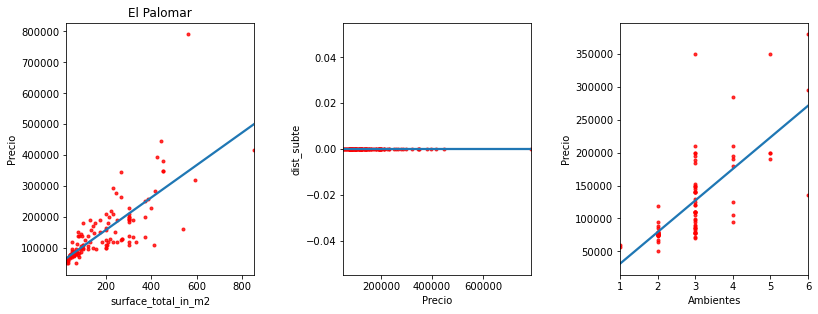

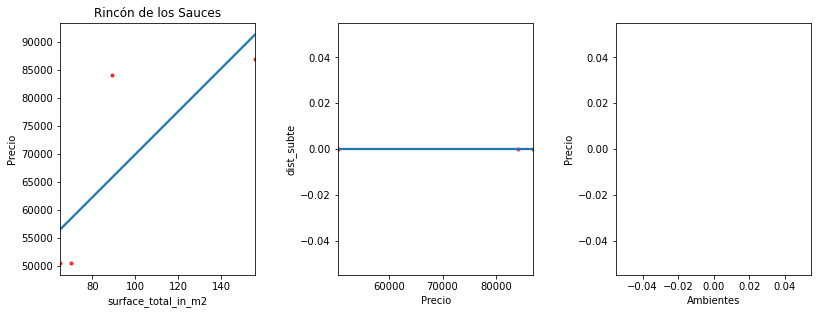

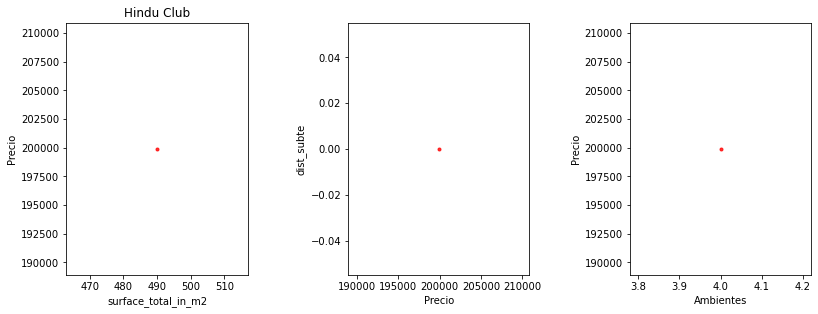

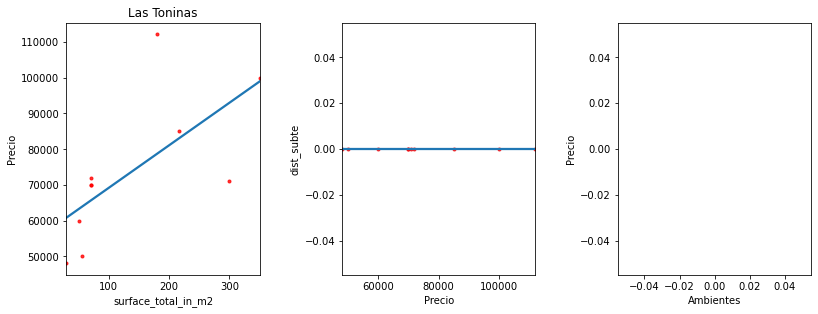

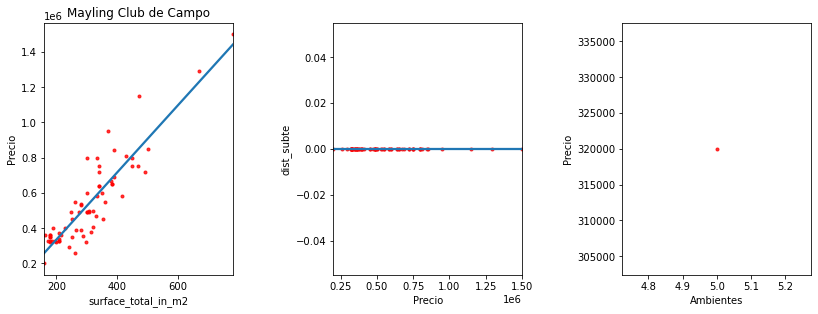

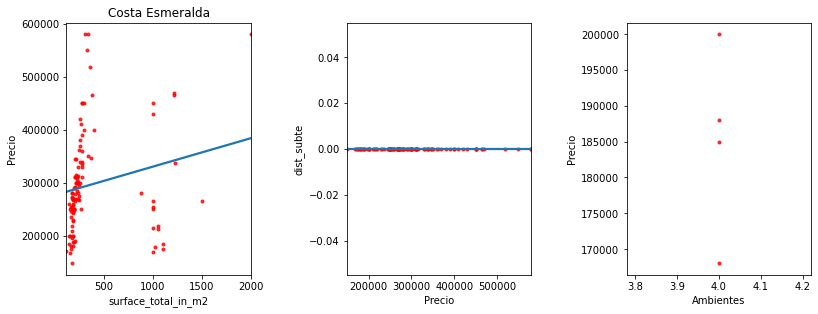

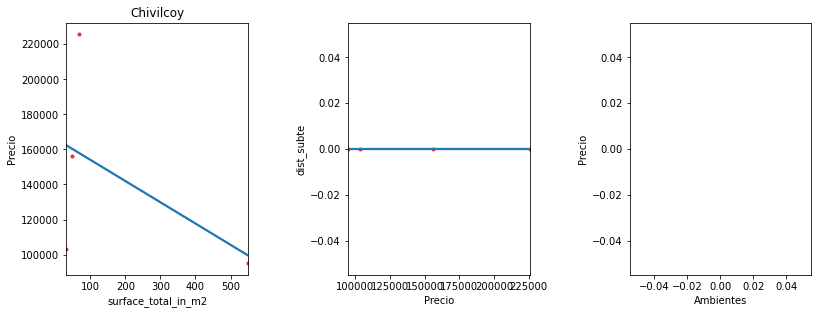

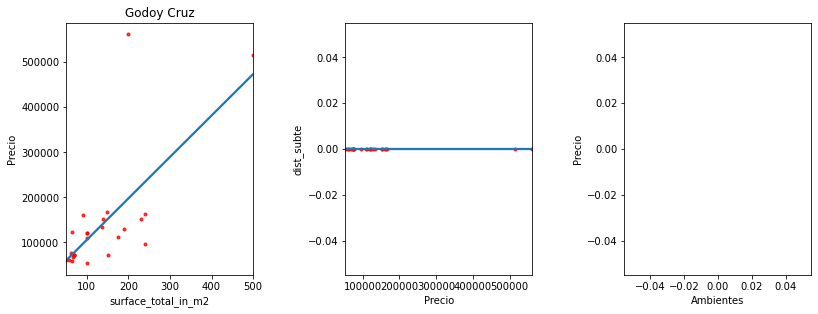

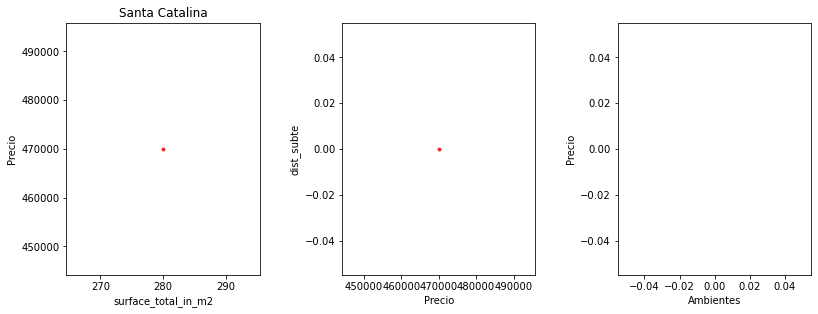

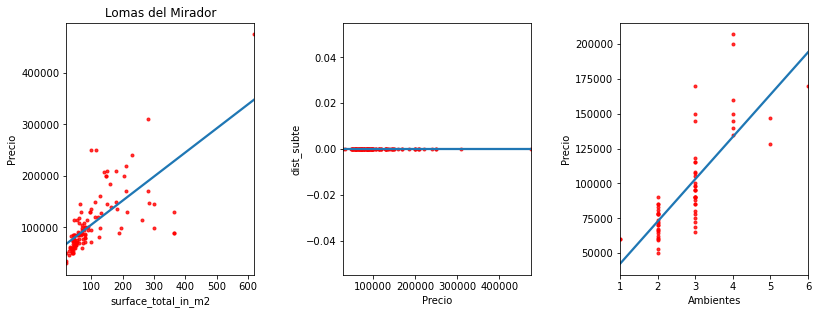

In [14]:
import warnings
warnings.filterwarnings("ignore")
def plotrel(ds, loc):
    pm = ds[ds['Barrio'] == loc]
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(12, 5), sharey=False)
    ax1.set_title(loc)
    sns.regplot(
        pm['surface_total_in_m2'],
        pm['Precio'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax1)
    sns.regplot(
        pm['Precio'],
        pm['dist_subte'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax2)
    sns.regplot(
        pm['Ambientes'],
        pm['Precio'],
        order=1,
        ci=None,
        scatter_kws={'color':'r', 's':9},
        ax=ax3)
    fig.tight_layout(pad=3.0)

places = list(data['Barrio'].unique())
for s in random.sample(places, 10):
    plotrel(data, s)

In [15]:
#Sacamos las columnas que no seran necesarias para el proximo análisis
data.drop(["lat", "lon", "Descripción", "Título"], axis=1, inplace = True)


In [16]:
#exportamos el dataset
data.to_csv('./data/properati-subtes.csv', sep=',', index=False)